In [80]:
import fiona
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import datetime

from sklearn.impute import SimpleImputer

In [81]:
path = os.getcwd() 

In [82]:
file_name = '/Users/durantonlucie/Desktop/no_missing_values_data_viz_velo 2.csv'

In [83]:
df= pd.read_csv(file_name, sep = ',')

In [84]:
df

,Unnamed: 0,Num_Acc,catr,vosp,vma,jour,an,hrmn,lum,dep,com,int,atm,grav,sexe,an_nais,trajet,secu1,secu2,secu3
0,0,202100000001,3,0,80,30,2021,07:32,2,30,30319,1,1,3,1,2000.0,1,0,9,-1
1,1,202100000006,4,0,50,23,2021,11:10,1,68,68004,3,1,4,1,2009.0,2,0,-1,-1
2,2,202100000038,4,0,50,2,2021,11:00,1,71,71540,1,1,3,1,2001.0,5,-1,-1,-1
3,3,202100000051,4,0,50,9,2021,23:30,5,31,31555,9,1,1,-1,1992.0,-1,-1,-1,-1
4,4,202100000070,4,-1,-1,4,2021,17:31,1,60,60057,1,1,4,1,2005.0,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,14970,201900058721,9,1,50,30,2019,18:15,5,69,69387,1,1,4,1,1991.0,1,8,0,-1
14971,14971,201900058727,4,1,50,30,2019,18:30,5,69,69389,1,1,4,1,1999.0,0,8,0,-1
14972,14972,201900058778,4,0,50,30,2019,17:25,5,75,75112,2,1,4,1,1986.0,1,2,8,-1
14973,14973,201900058782,4,1,50,30,2019,14:15,1,75,75104,1,1,4,1,1950.0,3,8,2,-1


# Viz à faire 

Agathe : 
- nb d'accidents selon météo 
- répartition accidents selon age / sexe
- répartition accidents selon catégorie de route 
- gravité de l'accident en fonction de la vitesse (histogramme ?)

Lucie : 
- evolution du nombre de casques portés depuis 2019 VS evolution nombre accident 
- gravité accident en fonction du nombre de casque (histogramme ?)
- nb d'accident selon luminosité 
- répartition des accidents dans la journée 


### Répartition du nombre d'accidents par catégorie de route

In [85]:
df['catr'].replace({1: 'Autoroute', 2: 'Route nationale', 3: 'Route Départementale', 4: 'Voie Communale', 5: 'Hors réseau public', 6: 'Parc de stationnement', 7: 'Routes de métropole urbaine', 9: 'Autres'}, inplace = True)
acc_by_cat = df[['Num_Acc', 'catr']].groupby(by = ['catr']).count()
acc_by_cat['percent'] = (acc_by_cat['Num_Acc'] / acc_by_cat['Num_Acc'].sum()) * 100

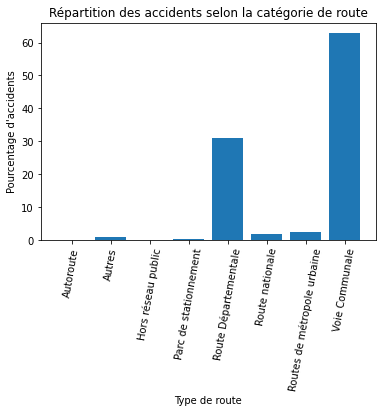

In [86]:
plt.bar(acc_by_cat.index, acc_by_cat['percent'])
plt.title("Répartition des accidents selon la catégorie de route")
plt.xlabel("Type de route")
plt.ylabel("Pourcentage d'accidents")
plt.tick_params(axis='x', labelrotation=80)

### Répartition des accidents selon la météo 

In [87]:
df['atm'].replace({-1 : 'Non renseigné', 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige - grêle', 5: 'Brouillard - fumée', 6: 'Vent fort - tempête', 7: 'Temps éblouissant', 8: 'Temps couvert', 9: 'Autres'}, inplace = True)
acc_by_atm = df[['Num_Acc', 'atm']].groupby(by = ['atm']).count()
acc_by_atm['percent'] = (acc_by_atm['Num_Acc'] / acc_by_atm['Num_Acc'].sum()) * 100

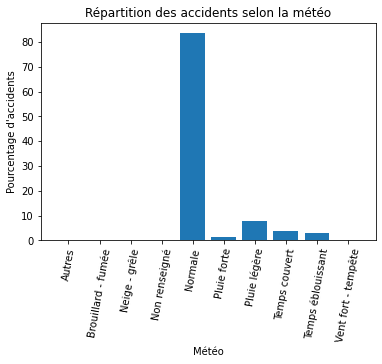

In [88]:
plt.bar(acc_by_atm.index, acc_by_atm['percent'])
plt.title("Répartition des accidents selon la météo")
plt.xlabel('Météo')
plt.ylabel("Pourcentage d'accidents")
plt.tick_params(axis='x', labelrotation=80)

### Répartition des accidents selon l'âge et le sexe 

In [89]:
# feature engineering : ajouter age 
year = datetime.date.today().year
df['age'] = df['an_nais'].apply(lambda x : year - x)

In [90]:
acc_by_age = df[['Num_Acc', 'age']].groupby(by = ['age']).count()
acc_by_age['percent'] = (acc_by_age['Num_Acc'] / acc_by_age['Num_Acc'].sum()) * 100

In [91]:
df['sexe'].replace({-1 : 'Non renseigné', 1: 'Masculin', 2: 'Féminin'}, inplace = True)
acc_by_sex = df[['Num_Acc', 'sexe']].groupby(by = ['sexe']).count()
acc_by_sex['percent'] = (acc_by_sex['Num_Acc'] / acc_by_sex['Num_Acc'].sum()) * 100

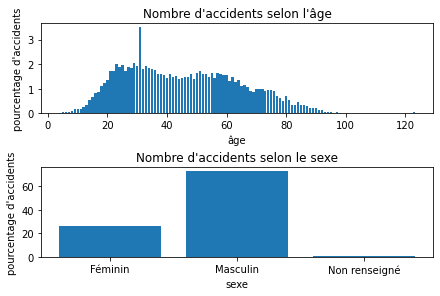

In [92]:
fig, ax_array = plt.subplots(2, 1, squeeze = True,constrained_layout=True)
ax_array[0].bar(acc_by_age.index,acc_by_age['percent'])
ax_array[0].set_xlabel('âge')
ax_array[0].set_ylabel("pourcentage d'accidents")
ax_array[0].set_title("Nombre d'accidents selon l'âge")
ax_array[1].bar(acc_by_sex.index,acc_by_sex['percent'])
ax_array[1].set_title("Nombre d'accidents selon le sexe")
ax_array[1].set_xlabel('sexe')
ax_array[1].set_ylabel("pourcentage d'accidents")
plt.show()

### Répartition des accidents selon la vitesse maximale autorisée 

In [93]:
df['vma'].replace([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15], value = 20, inplace = True)
df['vma'].replace([110, 120, 180, 300, 500, 600], value = 90, inplace = True)

In [94]:
acc_by_vma = df[['Num_Acc', 'vma']].groupby(by = ['vma']).count()
acc_by_vma['percent'] = (acc_by_vma['Num_Acc'] / acc_by_vma['Num_Acc'].sum()) * 100

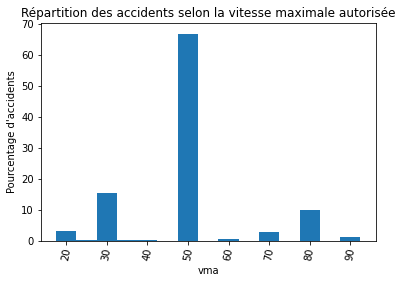

In [95]:
plt.bar(acc_by_vma.index, acc_by_vma['percent'], width = 5)
plt.title("Répartition des accidents selon la vitesse maximale autorisée")
plt.xlabel('vma')
plt.ylabel("Pourcentage d'accidents")
plt.tick_params(axis='x', labelrotation=80)

## Répartition des accidents selon le casque 

In [96]:
df['casque']=0

for i in range(len(df)):
    if df.secu1[i]==2 or df.secu2[i]==2 or df.secu3[i]==2:
        df.casque[i]=1
    

/var/folders/d5/kqjp2_sd2bs4yr709x7mfz3w0000gn/T/ipykernel_98581/4053461377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.casque[i]=1


In [97]:
df=df[df.grav!=-1]

In [98]:
df.grav.replace({1:"Indemne",2:"Tué",3:"Blessé hospitalisé",4:"Blessé léger"}, inplace=True)
df.casque.replace({0:"Sans casque",1:"Avec casque"}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


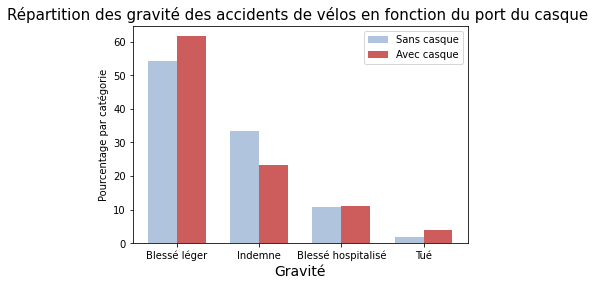

In [99]:
import numpy as np
import matplotlib.pyplot as plt
#Graphe montrant gravité des accidents en fonction du port du masque 

g = df.groupby('casque')
c_sans_casque = g.get_group("Sans casque")['grav'].value_counts()
c_avec_casque = g.get_group("Avec casque")['grav'].value_counts()

c_sans_casque=100*c_sans_casque/(c_sans_casque.sum())
c_avec_casque=100*c_avec_casque/(c_avec_casque.sum())


# On extrait les noms des différents gravité d'accidents et des différe
gravite = df['grav'].value_counts().index
port_casque = df['casque'].value_counts().index
pos = np.arange(len(gravite))
width = 0.35  # épaisseur de chaque bâton


# Création du diagramme en bâtons (bâtons côte à côte)

plt.bar(pos - width/2, c_sans_casque, width, color='lightsteelblue')
plt.bar(pos + width/2,c_avec_casque, width, color='IndianRed')
plt.xticks(pos, gravite)
plt.xlabel('Gravité', fontsize=14)
plt.ylabel('Pourcentage par catégorie')
plt.title('Répartition des gravité des accidents de vélos en fonction du port du casque ',fontsize=15)
plt.legend(port_casque,loc=1)
plt.show()

## Répartition des accidents au cours de la journée

In [100]:
df.hrmn=pd.to_datetime(df.hrmn)
df['heure']= df.hrmn.dt.hour
df.heure

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/d5/kqjp2_sd2bs4yr709x7mfz3w0000gn/T/ipykernel_98581/1385101623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heure']= df.hrmn.dt.hour


0         7
1        11
2        11
3        23
4        17
         ..
14970    18
14971    18
14972    17
14973    14
14974     7
Name: heure, Length: 14974, dtype: int64

In [101]:
d=df[['heure','vma']].groupby('heure').count()

<AxesSubplot:xlabel='heure'>

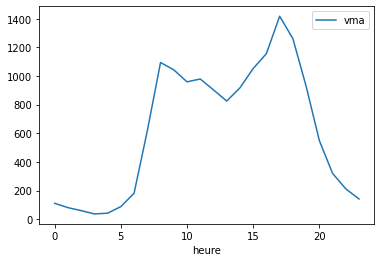

In [102]:
d.plot()

## Impact de la luminosité

In [103]:
df.lum.replace({1 :"Plein jour",2 :"Crépuscule ou aube",3 : "Nuit sans éclairage public",4 :"Nuit avec éclairage public non allumé", 5 : "Nuit avec éclairage public allumé"}, inplace=True)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Graphe montrant gravité des accidents en fonction du port du masque 

g = df.groupby('')
c_sans_casque = g.get_group("Sans casque")['grav'].value_counts()
c_avec_casque = g.get_group("Avec casque")['grav'].value_counts()

c_sans_casque=100*c_sans_casque/(c_sans_casque.sum())
c_avec_casque=100*c_avec_casque/(c_avec_casque.sum())


# On extrait les noms des différents gravité d'accidents et des différe
gravite = df['grav'].value_counts().index
port_casque = df['casque'].value_counts().index
pos = np.arange(len(gravite))
width = 0.35  # épaisseur de chaque bâton


# Création du diagramme en bâtons (bâtons côte à côte)

plt.bar(pos - width/2, c_sans_casque, width, color='lightsteelblue')
plt.bar(pos + width/2,c_avec_casque, width, color='IndianRed')
plt.xticks(pos, gravite)
plt.xlabel('Gravité', fontsize=14)
plt.ylabel('Pourcentage par catégorie')
plt.title('Répartition des gravité des accidents de vélos en fonction du port du casque ',fontsize=15)
plt.legend(port_casque,loc=1)
plt.show()

In [104]:
acc_by_lum = df[['Num_Acc', 'lum']].groupby(by = ['lum']).count()
acc_by_lum['percent'] = (acc_by_lum['Num_Acc'] / acc_by_lum['Num_Acc'].sum()) * 100

In [106]:
acc_by_lum

,Num_Acc,percent
lum,,
Crépuscule ou aube,871,5.816749
Nuit avec éclairage public allumé,1786,11.927341
Nuit avec éclairage public non allumé,62,0.414051
Nuit sans éclairage public,363,2.424202
Plein jour,11892,79.417657


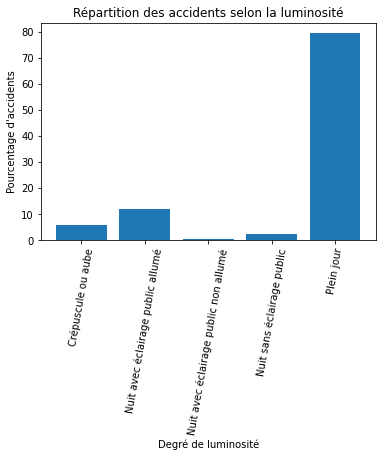

In [107]:
plt.bar(acc_by_lum.index, acc_by_lum['percent'])
plt.title("Répartition des accidents selon la luminosité")
plt.xlabel('Degré de luminosité')
plt.ylabel("Pourcentage d'accidents")
plt.tick_params(axis='x', labelrotation=80)

## Type de trajets

In [108]:
df.trajet.replace({-1:"Non renseigné",0 :"Non renseigné",1:"Domicile – travail",2 :"Domicile – école",3 :"Courses – achats",4 :"Utilisation professionnelle",5 :"Promenade – loisirs",9 :"Autre"}, inplace=True)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [109]:
acc_by_trajet = df[['Num_Acc', 'trajet']].groupby(by = ['trajet']).count()
acc_by_trajet['percent'] = (acc_by_trajet['Num_Acc'] / acc_by_trajet['Num_Acc'].sum()) * 100

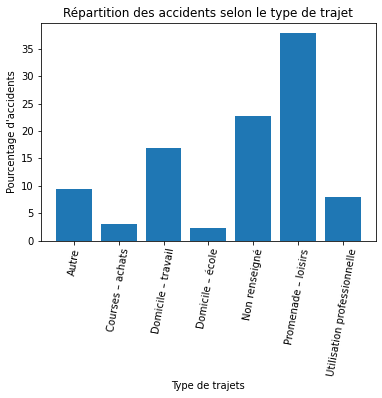

In [110]:
plt.bar(acc_by_trajet.index, acc_by_trajet['percent'])
plt.title("Répartition des accidents selon le type de trajet")
plt.xlabel('Type de trajets')
plt.ylabel("Pourcentage d'accidents")
plt.tick_params(axis='x', labelrotation=80)